# **JEDT Workshops | | 06/07/2019**

# **Bus Travel Time Prediction || Scikit-Learn/XGBoost || Regression problem**

**INTRODUCTION**

Hey Hey ! 😊Bienvenue dans ce super mega excitant workshop ! Aujourd'hui nous allons apprendre à utiliser Scikit-Learn et XGBoost avec le jeu de données contenant des informations de voyage de la ligne 71 pour prédire le temps de trajet entre deux positions.

Are You Reaaaaaaaady ! Set ! Go ! 🤤🤤🤤🤤

![alt text](http://s2.favim.com/orig/28/adtr-gif-jeremy-lets-go-Favim.com-231282.gif)


**MACHINE LEARNING**

 ***Alors commençons d'abord par un peu de théorie!
Et si on commencait par les bases?*** 

Great let's talk about Machine Learning!

Le Machine Learning, sous-domaine de l’Intelligence Artificielle, est l’ensemble des techniques qui fournit la capacité d’apprentissage à un système informatique. Il consiste donc donner à la machine la capacité d'éxécuter des taches(apprendre) sans etre explicitement programmé.
Il existe principalement 4 types d'apprentissage en Machine Learning :
- Apprentissage supervisé (Supervised learning)
- Apprentissage semi-supervisé (Semi Supervised Learning)
- Apprentissage non supervisé (Unsupervised learning)
- Apprentissage par  renforcement(Reinforcement learning)






**SUPERVISED VS UNSUPERVISED**
![alt text](https://blog.westerndigital.com/wp-content/uploads/2018/05/supervised-learning-diagram.jpg)

**DOMAINES D'APPLICATION**
 
Il existe une multitude d'applications du machine learning, on peut en citer entre autres:
-  Reconnaissance Faciale(Face Recognition)
-  Reconnaissance vocale(Speech recognition)
-  Diagnostic médical(Medical Dagnosis)
etc...


**PROCESSUS DE DÉVELOPPEMENT**

Comment mener à bien un projet de machine learning?
Il existe des processus de développement décrivant les différents phases que doit comporter un projet Machine Learning. On peut citer par exemple KDD(Knowledge Discovering in Databases), CRISP DM(Cross Industry Standard Process for Data Mining) , SEMMA(Sample, Explore, Modify, Model and Assess) etc.


***Alors vous etes pret à entrer dans le vif du sujet ?***

Alors on va un peu parler du projet à mettre en place!
L'obejctif du workshop d'aujourd'hui est de mettre en place un modèle Machine Learning qui va prédire le temps de trajet pour un voyage.
On va faire un petite présentation des outils que nous allons utiliser.
- Scikit-Learn:
- XGBoost
- Pandas

**LIVE DEMO**

Hey Talk is cheap , show the code!

***Installons d'abord quelques dépendances***

In [10]:
!pip install haversine
!pip install xgboost
!pip install dython

In [0]:
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from haversine import haversine
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,forest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from haversine import haversine
from dython.nominal import associations
from sklearn.utils import shuffle

Importation du jeu de données en l'occurence le fichier "data_new.csv"

In [31]:
uploaded = files.upload()

Saving data_new.csv to data_new (1).csv


***Chargement du jeu données dans un dataframe***

In [32]:
data = pd.read_csv(io.StringIO(uploaded['data_new.csv'].decode('utf-8')),parse_dates=['datetime'])
data.head()

,latitude,longitude,speed,datetime,trackingId,company,line
0,14.696173,-17.457460,0.000000,2018-05-28 23:56:50.921000+00:00,779dbefd-0d94-450e-8971-e4ffb419e449,aftu,71
1,14.696170,-17.457467,0.000000,2018-05-28 23:59:27.354000+00:00,05d15c29-1fc6-4f29-beb1-b823ece21b70,aftu,71
2,14.696179,-17.457473,0.000000,2018-05-29 00:09:15.233000+00:00,fe38cfe5-eaab-4598-b2e9-88cb7969607a,aftu,71
3,14.693557,-17.459105,6.668741,2018-05-29 00:10:00.694000+00:00,fe38cfe5-eaab-4598-b2e9-88cb7969607a,aftu,71
4,14.692543,-17.461795,0.000000,2018-05-29 00:11:21.476000+00:00,fe38cfe5-eaab-4598-b2e9-88cb7969607a,aftu,71


***Regroupement des données***

In [0]:
groups = data.groupby(['trackingId'])

***Mettons en place notre jeu de données initial***

In [34]:
#create a fonction for computing cartesian product
def cartesian_product_basic(left, right):
    return (left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))
  
temp = []
for keys, group in groups:
  #computing cartesian product of differents group and store it in temp variable
  temp.append(cartesian_product_basic(group, group))

#create a dataframe to store the dataset
dataset = pd.DataFrame(data=temp[0])
i = 1
while i<len(temp):
  df = pd.DataFrame(data = temp[i])
  dataset = pd.concat([dataset,df],axis=0,ignore_index=True)
  i = i + 1 
  
dataset.head()

,latitude_x,longitude_x,speed_x,datetime_x,trackingId_x,company_x,line_x,latitude_y,longitude_y,speed_y,datetime_y,trackingId_y,company_y,line_y
0,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.768950,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
1,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.756368,-17.324461,0.0,2018-07-18 10:12:06.873000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
2,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.725277,-17.296197,0.0,2018-07-18 10:14:45.083000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
3,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748355,-17.325661,0.0,2018-07-18 10:16:15.511000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
4,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748194,-17.325570,0.0,2018-07-18 10:18:05.636000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71


***Normaliser les nouvelles colonnes***

In [35]:
columns = {'latitude_x':'pickup_lat','longitude_x':'pickup_long','speed_x':'speed','datetime_x':'pickup_datetime','trackingId_x':'trackingId',
            'company_x':'company','line_x':'line','latitude_y':'dropoff_lat','longitude_y':'dropoff_long','datetime_y':'dropoff_datetime'}
dataset.rename(columns=columns, inplace=True)
dataset.head()

,pickup_lat,pickup_long,speed,pickup_datetime,trackingId,company,line,dropoff_lat,dropoff_long,speed_y,dropoff_datetime,trackingId_y,company_y,line_y
0,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.768950,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
1,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.756368,-17.324461,0.0,2018-07-18 10:12:06.873000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
2,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.725277,-17.296197,0.0,2018-07-18 10:14:45.083000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
3,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748355,-17.325661,0.0,2018-07-18 10:16:15.511000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71
4,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748194,-17.325570,0.0,2018-07-18 10:18:05.636000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71


***Suppression des colonnes inutiles***

In [36]:
columns= ['speed_y','trackingId_y','company_y','line_y']
dataset = dataset.drop(columns,axis=1)
dataset.head()

,pickup_lat,pickup_long,speed,pickup_datetime,trackingId,company,line,dropoff_lat,dropoff_long,dropoff_datetime
0,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.768950,-17.319019,2018-07-18 10:11:05.566000+00:00
1,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.756368,-17.324461,2018-07-18 10:12:06.873000+00:00
2,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.725277,-17.296197,2018-07-18 10:14:45.083000+00:00
3,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748355,-17.325661,2018-07-18 10:16:15.511000+00:00
4,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748194,-17.325570,2018-07-18 10:18:05.636000+00:00


***Vérifions si on a pas de Null values dans le jeu de données***

In [37]:
dataset.isnull().sum()

pickup_lat          0
pickup_long         0
speed               0
pickup_datetime     0
trackingId          0
company             0
line                0
dropoff_lat         0
dropoff_long        0
dropoff_datetime    0
dtype: int64

***Création de nouvelles variables***

Calcul de la durée du trajet

In [0]:
dataset['trip_duration'] = (dataset['dropoff_datetime'] - dataset['pickup_datetime']).dt.total_seconds()
#filter result by taking only positive records
dataset = dataset.query('trip_duration > 0')

Ajout des informations sur la date(heure, mois, weekday etc...)

In [0]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    '''if not np.issubdtype(fld.dtypes, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld,infer_datetime_format=True)'''
    for n in ('month','day','hour','minute', 'weekday', 
              'is_month_end', 'is_month_start'):
        df[n] = getattr(fld.dt,n)
    if drop: df.drop(fldname, axis=1, inplace=True)
      
add_datepart(dataset,'pickup_datetime',drop=False)

In [40]:
dataset['is_weekend'] = dataset['weekday']
dataset['is_weekend'] = dataset['is_weekend'].map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
dataset.head()

,pickup_lat,pickup_long,speed,pickup_datetime,trackingId,company,line,dropoff_lat,dropoff_long,dropoff_datetime,trip_duration,month,day,hour,minute,weekday,is_month_end,is_month_start,is_weekend
1,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.756368,-17.324461,2018-07-18 10:12:06.873000+00:00,61.307,7,18,10,11,2,False,False,False
2,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.725277,-17.296197,2018-07-18 10:14:45.083000+00:00,219.517,7,18,10,11,2,False,False,False
3,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748355,-17.325661,2018-07-18 10:16:15.511000+00:00,309.945,7,18,10,11,2,False,False,False
4,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.748194,-17.325570,2018-07-18 10:18:05.636000+00:00,420.070,7,18,10,11,2,False,False,False
5,14.76895,-17.319019,0.0,2018-07-18 10:11:05.566000+00:00,00b84e14-57f6-4319-93d0-f2fcd1f59cbf,aftu,71,14.750238,-17.345286,2018-07-18 10:21:11.641000+00:00,606.075,7,18,10,11,2,False,False,False


calcul de la distance

In [0]:
#create tuple for pickup and dropoff positions
dataset.loc[:,'pickup_latlong'] = dataset[['pickup_lat', 'pickup_long']].apply(tuple, axis=1)
dataset.loc[:,'dropoff_latlong'] = dataset[['dropoff_lat', 'dropoff_long']].apply(tuple, axis=1)
haversine_dist = []
for index,rows in dataset.iterrows():
  temp = haversine(dataset['pickup_latlong'][index],dataset['dropoff_latlong'][index])
  haversine_dist.append(temp)
#create the column to store the result  
dataset = dataset.assign(haversine_dist=haversine_dist)

**Suppression des colonnes inutiles**

In [42]:
dataset = dataset.query('hour < 22 and hour > 6')
columns = ['pickup_datetime',	'trackingId',	'company','line','dropoff_datetime','pickup_latlong',	'dropoff_latlong']
dataset = dataset.drop(columns=columns,axis=1)
dataset.head()

,pickup_lat,pickup_long,speed,dropoff_lat,dropoff_long,trip_duration,month,day,hour,minute,weekday,is_month_end,is_month_start,is_weekend,haversine_dist
1,14.76895,-17.319019,0.0,14.756368,-17.324461,61.307,7,18,10,11,2,False,False,False,1.516497
2,14.76895,-17.319019,0.0,14.725277,-17.296197,219.517,7,18,10,11,2,False,False,False,5.441088
3,14.76895,-17.319019,0.0,14.748355,-17.325661,309.945,7,18,10,11,2,False,False,False,2.398848
4,14.76895,-17.319019,0.0,14.748194,-17.325570,420.070,7,18,10,11,2,False,False,False,2.413080
5,14.76895,-17.319019,0.0,14.750238,-17.345286,606.075,7,18,10,11,2,False,False,False,3.508019


***Faisons quelques visualisations***

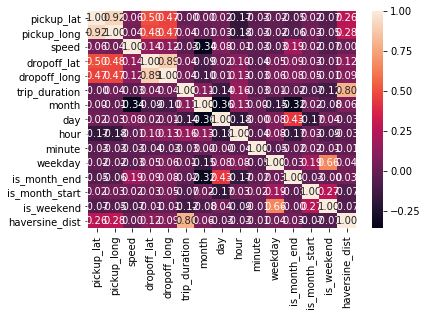

In [43]:
associations(dataset,theil_u=True)

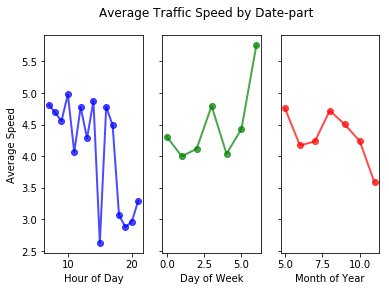

In [44]:
dataset.loc[:, 'avg_speed_h'] = 1000 * dataset['haversine_dist'] / dataset['trip_duration']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(dataset.groupby('hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(dataset.groupby('weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(dataset.groupby('month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

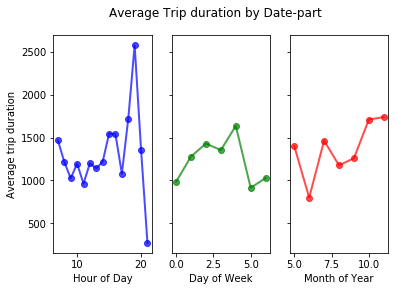

In [45]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(dataset.groupby('hour').mean()['trip_duration'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(dataset.groupby('weekday').mean()['trip_duration'], 'go-', lw=2, alpha=0.7)
ax[2].plot(dataset.groupby('month').mean()['trip_duration'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average trip duration')
fig.suptitle('Average Trip duration by Date-part')
plt.show()

***Il est temps de mettre en place le modèle***

Subdivisons d'abord le jeu de données

In [46]:
dataset = shuffle(dataset).reset_index(drop=True)
dataset  = dataset.drop(columns=['avg_speed_h'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['trip_duration'], test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
print('Training features Shape:', X_train.shape)
print('Training labels Shape:', y_train.shape)
print('Validation features Shape:', X_valid.shape)
print('Validation labels Shape:', y_valid.shape)
print('Testing featuresShape:', X_test.shape)
print('Testing labels Shape:', y_test.shape)

Training features Shape: (85128, 15)
Training labels Shape: (85128,)
Validation features Shape: (15023, 15)
Validation labels Shape: (15023,)
Testing featuresShape: (17674, 15)
Testing labels Shape: (17674,)


**Création des modèles**

In [0]:

#labels are the variable that we want to predict
train_labels = np.array(y_train)

#features represent the predictors also named independant variables
train_features = X_train.drop(['trip_duration'],axis=1)

#save the features list 
features_list = list(train_features)

#convert to numpy array
train_features = np.array(train_features)


In [48]:
# we will model for both Random Forest,MultiLinear Regression, ExtraTreeRegressor and XGBoost

#Set params for XGBoost
dtrain = xgb.DMatrix(train_features, label=train_labels)
dvalid = xgb.DMatrix(X_valid.drop('trip_duration',axis=1).values)
evals = [(dtrain, 'train')]
params = {
        'min_child_weight': 1, 'eta': 0.11,
        'colsample_bytree':0.2,'max_depth': 8,
        'subsample': 0.5,'lambda':0.4,
        'booster': 'gbtree', 'gamma': 0.6,
        'eval_metric':'rmse',
        'objective': 'reg:linear','n_estimators':20,
        'n_jobs':-1,'base_score':0.5
    }

#validation features
valid_features = X_valid.drop('trip_duration',axis=1)

models = []
models.append(('MultiLinearRegression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor(n_estimators=20 , min_samples_leaf=25, max_features=0.5, n_jobs=-1)))
models.append(('ExtaTreeRegressor', ExtraTreesRegressor(n_estimators=20, bootstrap=True, min_samples_leaf=25, max_features='auto', n_jobs=-1)))
models.append(('XGBoost',xgb))

results = []
names = []
for name, model in models:
 if(name=='XGBoost'):
   model= model.train(params=params, dtrain=dtrain, num_boost_round=227,evals=evals, early_stopping_rounds=300,maximize=False,verbose_eval=20)
   predictions = model.predict(dvalid)
 else:
    model.fit(train_features,train_labels)
    predictions = model.predict(valid_features)
 result = r2_score(y_valid,predictions)
 results.append(result)
 names.append(name)

[15:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:1667.5
Will train until train-rmse hasn't improved in 300 rounds.
[20]	train-rmse:678.38
[40]	train-rmse:524.971
[60]	train-rmse:404.467
[80]	train-rmse:355.281
[100]	train-rmse:318.704
[120]	train-rmse:275.045
[140]	train-rmse:253.983
[160]	train-rmse:239.571
[180]	train-rmse:232.096
[200]	train-rmse:218.616
[220]	train-rmse:210.301
[226]	train-rmse:207.074


In [49]:
name = pd.DataFrame(data=names,columns=['Model'],index=[0,1,2,3])
score = pd.DataFrame(data=results,columns=['Score'],index=[0,1,2,3])
model_score = pd.concat([name,score],axis=1)
model_score['Score'] = model_score['Score']*100
model_score

,Model,Score
0,MultiLinearRegression,71.839785
1,Random Forest,95.841654
2,ExtaTreeRegressor,94.187987
3,XGBoost,96.355407


**Test du model le plus performant (XGBOOST) sur le jeu de données de test**

In [52]:
X_test.head()

,pickup_lat,pickup_long,speed,dropoff_lat,dropoff_long,trip_duration,month,day,hour,minute,weekday,is_month_end,is_month_start,is_weekend,haversine_dist
8396,14.718751,-17.446427,0.0,14.770254,-17.318799,2319.039,11,13,14,7,1,False,False,False,14.871203
58680,14.746520,-17.377726,0.0,14.713324,-17.460452,1395.350,7,12,7,44,3,False,False,False,9.631840
8893,14.726447,-17.444321,0.0,14.729647,-17.443101,163.605,9,26,16,20,2,False,False,False,0.379267
17425,14.771861,-17.317672,0.0,14.725707,-17.444933,3262.394,10,2,16,56,1,False,False,False,14.615237
116392,14.686050,-17.450347,0.0,14.745747,-17.376590,2647.765,7,6,10,35,4,False,False,False,10.343363


In [53]:
X_test = pd.DataFrame(data=[['14.685400',	'-17.454020'	,'1.33416',	'14.749995',	'-17.336170',	'7',	'06',	'15',	'23',	'5'	,False,	False	,True	,'14.568124']],
                      columns=X_valid.drop(['trip_duration'],axis=1).columns)
dtest = xgb.DMatrix(X_test.values)
predictions = model.predict(dtest)
prediction_df = pd.DataFrame(data=predictions,columns=['trip_duration'])
prediction_df = prediction_df/60
prediction_df.head()

,trip_duration
0,75.288445
